In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Import marketing.csv with date columns
marketing = pd.read_csv(r'/Users/empty/Documents/Practice Python/marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.day_name()

marketing['DoW']

0           Monday
1           Monday
2           Monday
3           Monday
4           Monday
           ...    
10032    Wednesday
10033    Wednesday
10034    Wednesday
10035    Wednesday
10036    Wednesday
Name: DoW, Length: 10037, dtype: object

In [96]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


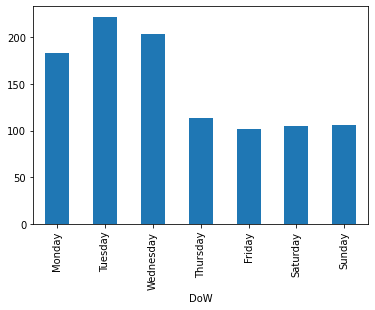

In [100]:
week_subscribers = marketing.groupby(['DoW'],sort=False)['user_id'].nunique()
week_subscribers.plot(kind='bar')

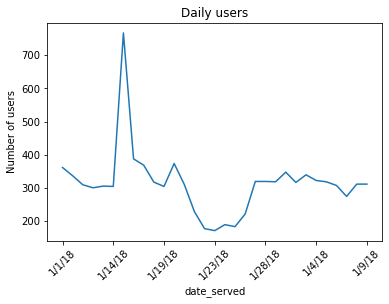

In [8]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

In [75]:
marketing.describe()

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


In [76]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

In [12]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()
total

7309

In [15]:
# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()
subscribers

1015

In [14]:
# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


In [16]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


In [17]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [23]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()
total

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64

In [24]:
# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [27]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
daily_conversion_rate.head()

date_served
1/1/18     0.099448
1/10/18    0.118694
1/11/18    0.080645
1/12/18    0.076412
1/13/18    0.084967
Name: user_id, dtype: float64

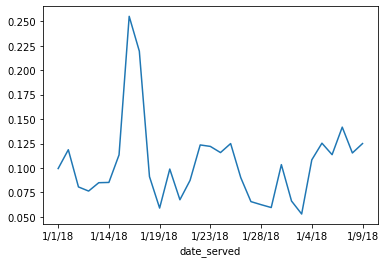

In [28]:
daily_conversion_rate.plot()

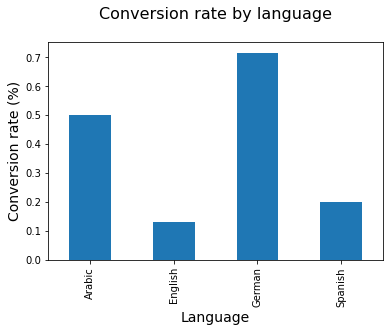

In [29]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)

# Display the plot
plt.show()

In [30]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

In [56]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate)
dailyconversion = daily_conversion_rate.drop(daily_conversion_rate[['level_0', 'index']], axis=1)
daily_conversion = dailyconversion.set_index('date_served')
daily_conversion

,user_id
date_served,
1/1/18,0.099448
1/10/18,0.118694
1/11/18,0.080645
1/12/18,0.076412
1/13/18,0.084967
1/14/18,0.085246
1/15/18,0.113429
1/16/18,0.255155
1/17/18,0.219512


In [60]:
# Rename columns
daily_conversion.columns = ['conversion_rate']
daily_conversion

,conversion_rate
date_served,
1/1/18,0.099448
1/10/18,0.118694
1/11/18,0.080645
1/12/18,0.076412
1/13/18,0.084967
1/14/18,0.085246
1/15/18,0.113429
1/16/18,0.255155
1/17/18,0.219512


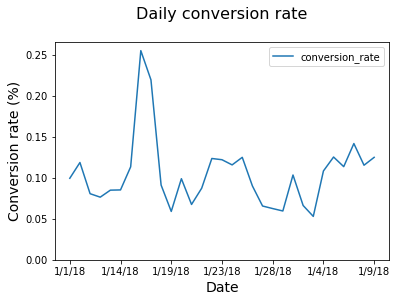

In [64]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion.plot()

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

In [67]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()
channel_age

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [69]:
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


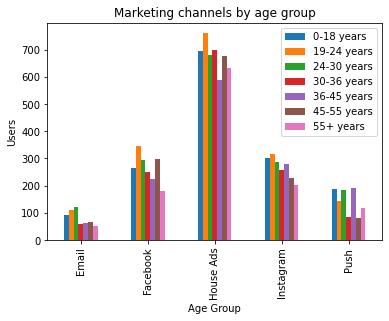

In [70]:
# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [73]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


In [103]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

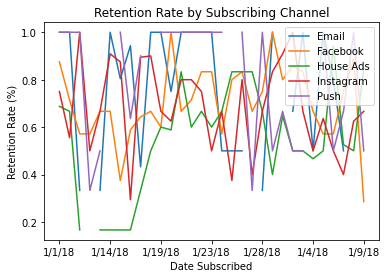

In [104]:
# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

In [105]:
#Building a retention function

def retention_rate(dataframe, column_names):
    
    #Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True]\
                        .groupby(column_names)['user_id'].nunique()
    
    # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True]\
                        .groupby(column_names)['user_id'].nunique()
    
    retention_rate = retained/converted
    
    return retention_rate

In [106]:
daily_retention = retention_rate(marketing, ['date_subscribed','subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


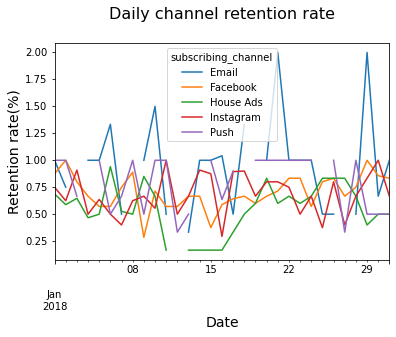

In [112]:
daily_retention.plot()
plt.title('Daily channel retention rate\n', size = 16)
plt.ylabel('Retention rate(%)', size=14)
plt.xlabel('Date', size=14)
plt.show()

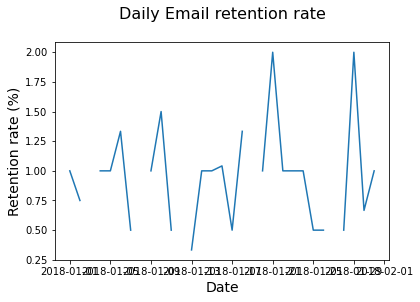

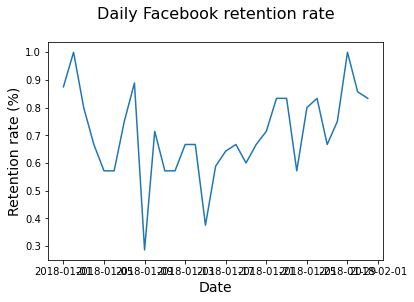

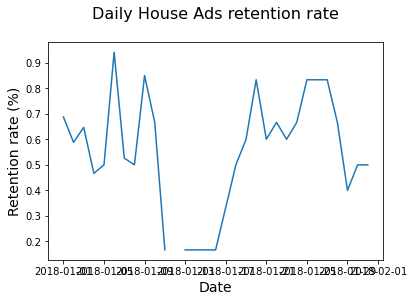

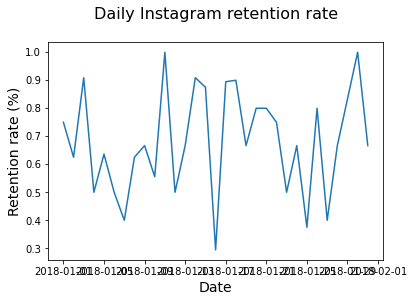

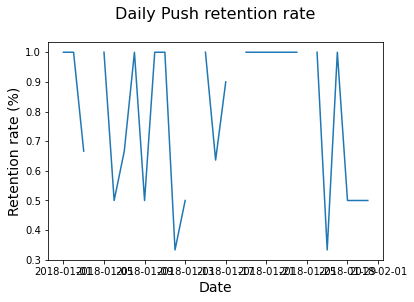

In [118]:
# Plotting function
def plotting(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' retention rate\n', size = 16)
        plt.ylabel('Retention rate (%)', size = 14)
        plt.xlabel('Date', size = 14)
        plt.show()
        
plotting(daily_retention)

In [119]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

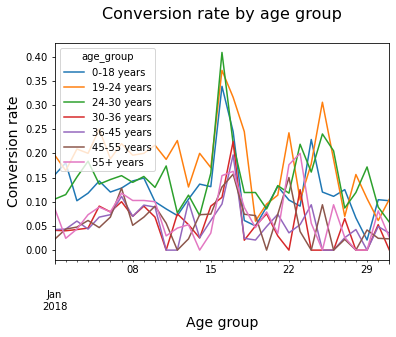

In [120]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served',
                                             'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [122]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

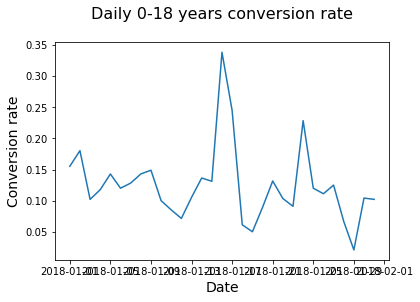

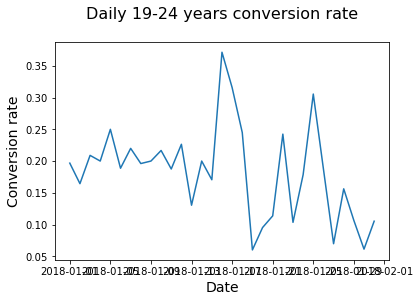

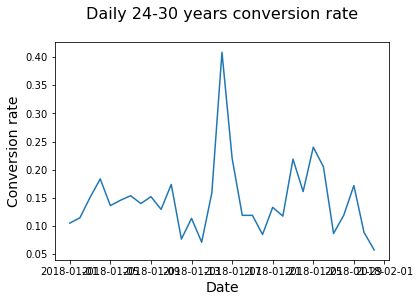

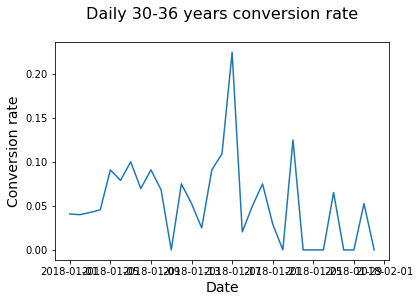

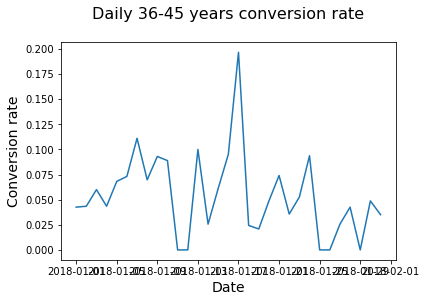

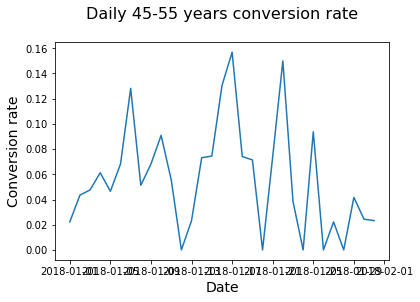

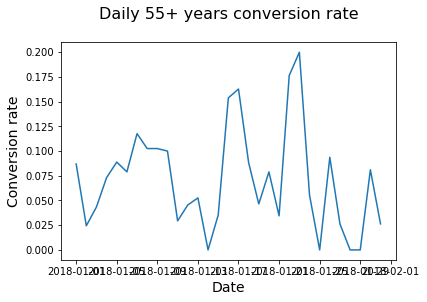

<Figure size 432x288 with 0 Axes>

In [123]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

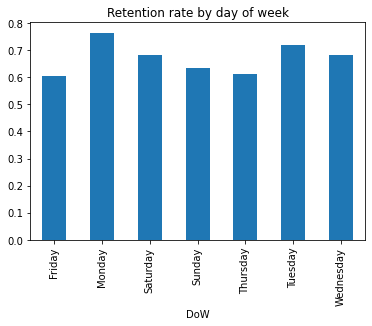

In [130]:
DoW_retention = retention_rate(marketing, ['DoW'])

# Plot retention by day of week
DoW_retention.plot(kind='bar')
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()

In [131]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


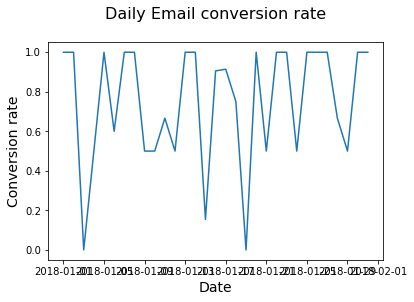

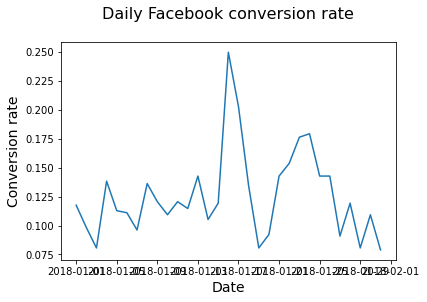

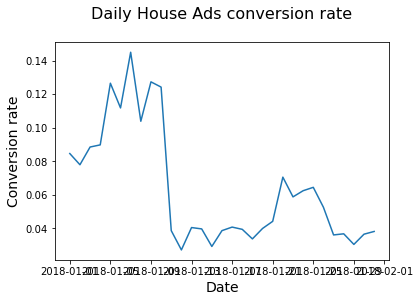

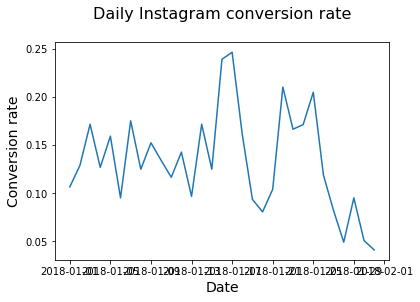

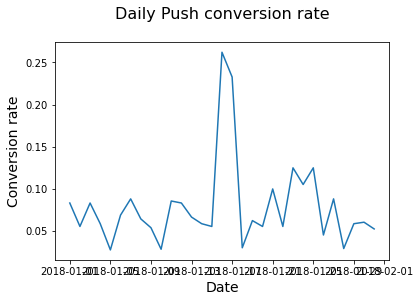

<Figure size 432x288 with 0 Axes>

In [132]:
# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

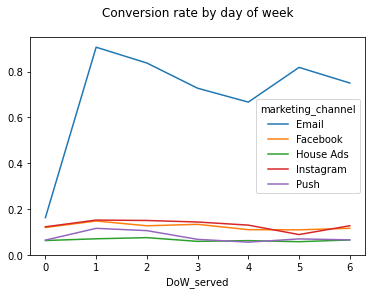

In [133]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()